In [2]:
#%matplotlib inline
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
#plotting, style
import numpy as np
from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex
#SetAtlasStyle()
ROOT.gStyle.SetPalette(ROOT.kViridis);


# Data and MC files

In [3]:
#Datafile = ROOT.TFile('/home/dhruv/13def_4L_16_10GeV30GeV_yesnoISO.root')
#MCfile = ROOT.TFile('/home/dhruv/17g6a1_5GeV60GeV_4L_w2Dplots_noPhos_200Kevents_zv.root')
MCfile = ROOT.TFile('/home/dhruv/17g6a1_5GeV60GeV_200Kevents_ISOeff.root')
#MCfile = ROOT.TFile('/home/dhruv/18b10ab_5GeV60GeV_200Kevents_ISOeff_noDisBadChn_noShwrShp_noISO.root')




#Isolated Photon Cross Section:
    #pPb data sets
Datafile = ROOT.TFile('/home/dhruv/isoPhotonOutput/Data/fout_16_14bins_13d_cluster_emcalTrig_Allevent_wEventSelect_allClusCuts_noDownScale_2piNevdEdEtaPhi_newIsoDef.root')


### Luminosity Calculation

In [5]:
Rtrig1 = 5800
Rtrig1_err = 648
Rtrig2 = 1477
Rtrig2_err = 100

#NevEG1 = Datafile.Get("hNormalzier").GetBinContent(5)
#NevEG2 = Datafile.Get("hNormalzier").GetBinContent(6)

sigma_MB_pPb = 2.09
sigma_MB_pPB_err = 0.07
sigma_MB_Pbp = 2.12
sigma_MB_Pbp_err = 0.07

#sigma_MB = [(Nev_pPb *sigma_MB_pPb) + ]/(Nev_pPb + Nev_Pbp)
#sigma_MB = 2.11
#sigma_MB



### Get response Matrix and plot it, also true/reco ratio

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


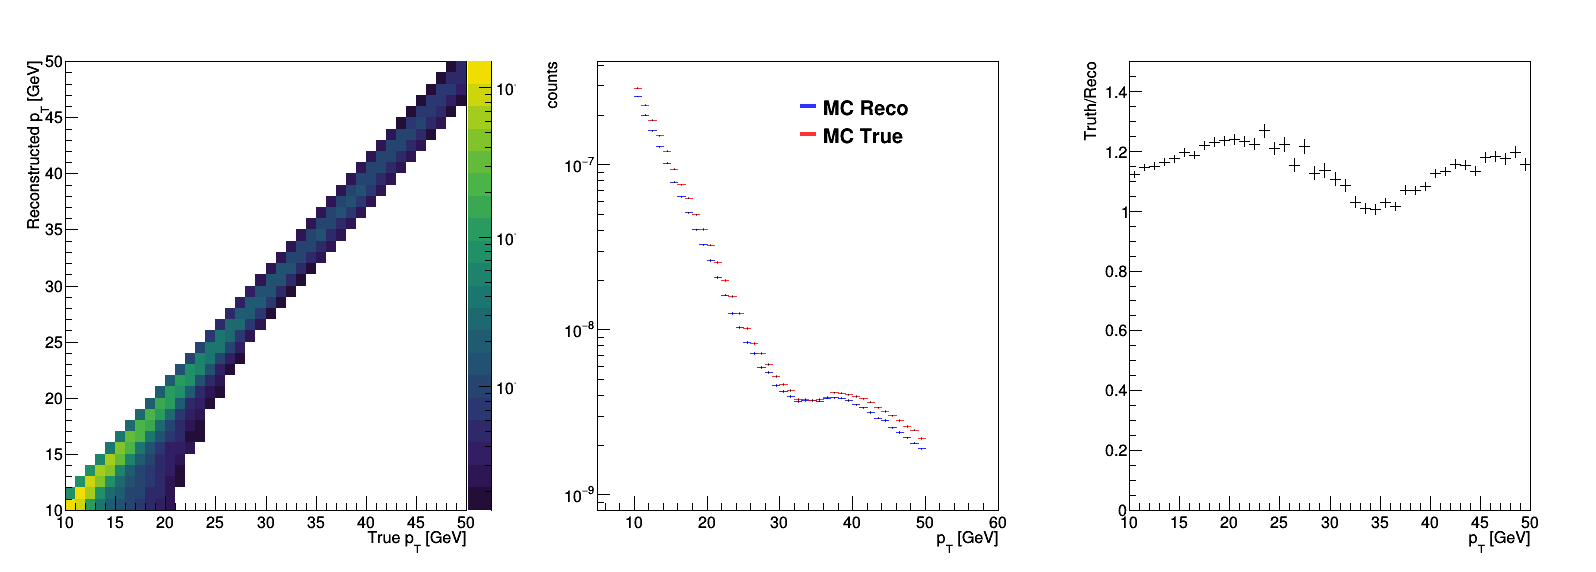

In [6]:
responseMatrix = MCfile.Get("h_Correlation");
#responseMatrix.Rebin2D(2,2)
responseMatrix.ClearUnderflowAndOverflow()
mc_truth = responseMatrix.ProjectionX()
mc_reco = responseMatrix.ProjectionY()
for i in range(mc_truth.GetNbinsX()):
    binWidth = mc_truth.GetBinWidth(i)
    binCon_truth = mc_truth.GetBinContent(i)
    binCon_reco = mc_reco.GetBinContent(i)
    mc_truth.SetBinContent(i, binCon_truth/binWidth)
    mc_reco.SetBinContent(i, binCon_reco/binWidth)
mc_truth.Sumw2()
mc_reco.Sumw2()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

ratio_mc = mc_truth.Clone()
ratio_mc.SetLineColor(1)
ratio_mc.Divide(mc_reco)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
responseMatrix.GetXaxis().SetRangeUser(10,50)
responseMatrix.GetYaxis().SetRangeUser(10,50)
responseMatrix.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

label = Legend("")
label.Add(mc_reco,'MC Reco','L')
label.Add(mc_truth,'MC True','L')

hs_mc = ROOT.THStack()
mc_truth.GetXaxis().SetRangeUser(10,50)
mc_reco.GetXaxis().SetRangeUser(10,50)
hs_mc.Add(mc_reco)
hs_mc.Add(mc_truth)
hs_mc.Draw('nostack')
hs_mc.SetTitle('; p_{T} [GeV]; counts')

label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc.GetXaxis().SetRangeUser(10,50)
ratio_mc.GetYaxis().SetRangeUser(0,1.5)
ratio_mc.Draw('L')
ratio_mc.SetTitle(' ; p_{T} [GeV]; Truth/Reco')
c.Draw()
#c.SaveAs('Matrix_photon_pPb.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


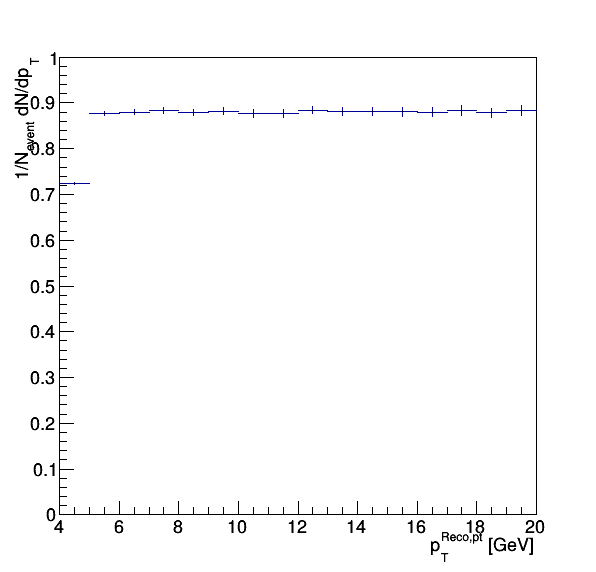

In [7]:
hYesISO = MCfile.Get('h_YesISO')
hNoISO = MCfile.Get('h_NoISO')
isoEff = hYesISO.Clone()
isoEff.Divide(hNoISO)
isoEff.GetYaxis().SetRangeUser(0,1)
isoEff.GetXaxis().SetRangeUser(0,20)
#isoEff.Fit('pol0')
c = ROOT.TCanvas('c','c',600,600)
isoEff.Draw()
c.Draw()
#c.SaveAs('isoEff.pdf')

### Get measured track pt spectrum

In [8]:
data = Datafile.Get('hReco')
data.SetTitle(";p_{T}^{reco}[GeV];counts")
data.ClearUnderflowAndOverflow()

c.Clear()
data.Draw("E")
ROOT.gPad.SetLogy()
c.Draw()

AttributeError: 'TObject' object has no attribute 'SetTitle'

### Get and plot efficiency and fake rate

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


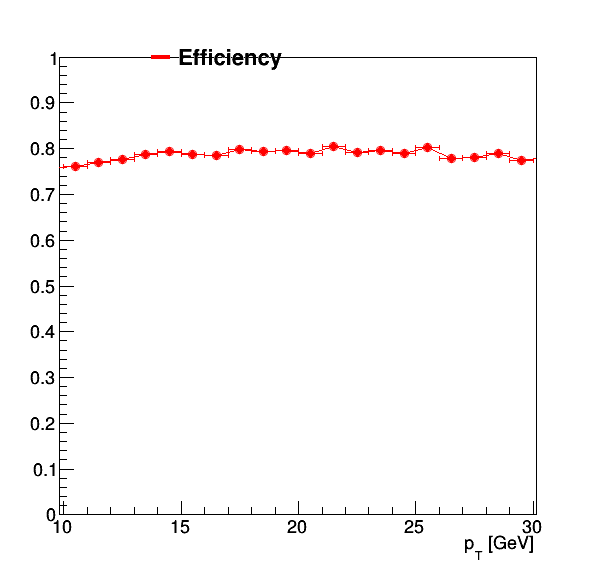

In [9]:
#Get efficiency and fake rate
efficiency = MCfile.Get("Efficiency");
#fakerate   = MCfile.Get("h_Fake");

#Plot efficiency and fake rate
efficiency.SetTitle('; p_{T} [GeV]')
efficiency.SetMinimum(0.0)
efficiency.SetMaximum(1.0)
efficiency.SetMarkerStyle(20)
efficiency.SetMarkerColor(2)
efficiency.SetLineColor(2)
efficiency.GetXaxis().SetRangeUser(10,30)
#fakerate.SetMarkerStyle(20)
#fakerate.SetLineColor(4)
#fakerate.SetMarkerColor(4)

c = ROOT.TCanvas('c','c',600,600)
efficiency.Draw()
#fakerate.Draw('same')

label = Legend("")
label.Add(efficiency,'Efficiency','L')
#label.Add(fakerate,'Fake rate','L')
label.Draw(.25,.95)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_photon_pp.png')

# EMCAL/DCAL comparison

In [4]:
photonSpectrum_pp_emcal = pp_Datafile.Get('hReco_emcal')
photonSpectrum_pp_dcal = pp_Datafile.Get('hReco_dcal')

photonSpectrum_pp_emcal.SetMarkerStyle(20)
photonSpectrum_pp_emcal.SetMarkerColor(ROOT.kOrange+1)
photonSpectrum_pp_emcal.SetLineColor(ROOT.kOrange+1)
photonSpectrum_pp_dcal.SetMarkerStyle(20)
photonSpectrum_pp_dcal.SetMarkerColor(ROOT.kRed-1)
photonSpectrum_pp_dcal.SetLineColor(ROOT.kRed-1)

detector_ratio_pp = photonSpectrum_pp_emcal.Clone()
detector_ratio_pp.Divide(photonSpectrum_pp_dcal)
detector_ratio_pp.SetTitle(';p_{T} [GeV/c];')


****************************************
Minimizer is Linear
Chi2                      =      5.69083
NDf                       =            8
p0                        =      1.00252   +/-   0.0199343   


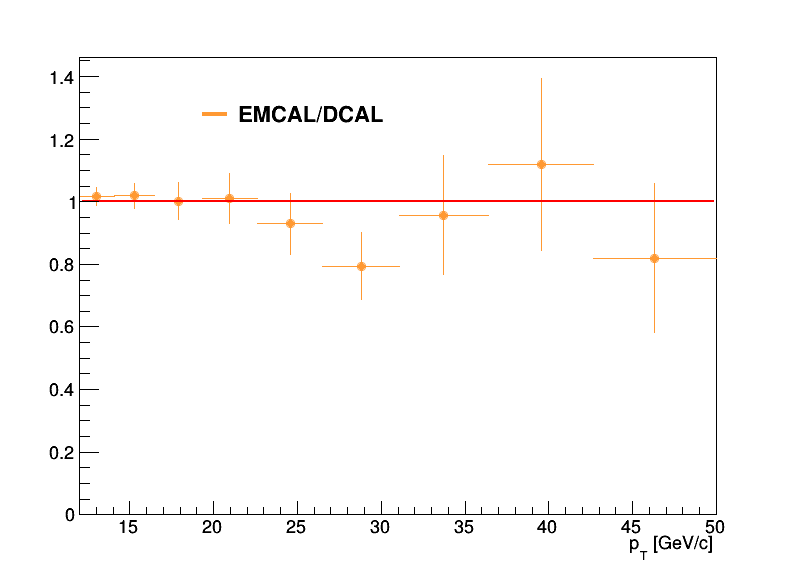

In [5]:
c = ROOT.TCanvas('c','c',800,600)

detector_ratio_pp.GetXaxis().SetRangeUser(12,50)
detector_ratio_pp.SetMinimum(0.0)
detector_ratio_pp.Fit('pol0')
detector_ratio_pp.Draw()
#ratio_unity.Draw('histsame')

label = Legend("")
label.Add(detector_ratio_pp,'EMCAL/DCAL','L')
label.Draw(.25,.85)

c.Draw()
#c.SaveAs('DCalEMCalRatio_pp_log9bin.png')
#c.SaveAs('DCalEMCalRatio_pp.pdf')

# Trigger Efficiency

In [ ]:
Trigfile =  ROOT.TFile('/home/dhruv/13def_4L_16_10GeV30GeV_yesnoISO.root')